In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transaction-naration-data-set/Transaction_Naration_Data_Set.csv


In [2]:
data=pd.read_csv('/kaggle/input/transaction-naration-data-set/Transaction_Naration_Data_Set.csv')
data.head()

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit
4,4,1978564,2550.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit


In [3]:
cols=['NARATION']
duplicates = data.duplicated(subset=cols,keep=False)
print(duplicates)

0           True
1           True
2           True
3           True
4           True
            ... 
22546753    True
22546754    True
22546755    True
22546756    True
22546757    True
Length: 22546758, dtype: bool


In [ ]:
print("Number of duplicates:", duplicates.sum())

In [ ]:
data.info()

In [4]:

sub_data = data.drop_duplicates(subset=cols)
sub_data.info()
# sub_data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128604 entries, 0 to 22544595
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  128604 non-null  int64  
 1   AC_ID       128604 non-null  int64  
 2   AMOUNT      128604 non-null  float64
 3   DOC_DATE    128604 non-null  object 
 4   NARATION    128603 non-null  object 
 5   DR_CR       128604 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


In [ ]:
sub_data.isnull().sum()

In [5]:
sub_data.dropna(subset=['NARATION'],inplace=True)
sub_data.isnull().sum()
sub_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 128603 entries, 0 to 22544595
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  128603 non-null  int64  
 1   AC_ID       128603 non-null  int64  
 2   AMOUNT      128603 non-null  float64
 3   DOC_DATE    128603 non-null  object 
 4   NARATION    128603 non-null  object 
 5   DR_CR       128603 non-null  object 
dtypes: float64(1), int64(2), object(3)
memory usage: 6.9+ MB


/tmp/ipykernel_339/277431213.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data.dropna(subset=['NARATION'],inplace=True)


In [58]:
narations=sub_data[['NARATION','AC_ID']].copy()
narations.tail()

,NARATION,AC_ID
22538287,Guatala Udc,4010179
22539045,"Transaction For Fund Transfer. Smart App, Regu...",4199653
22539930,Cash Deposit গারামাসি উল্লী উন্নয়ন,2389876
22543261,আসাদ ভাই এর কাছে জমা হাজার টাকা,4817300
22544595,গাড়ামাসি পল্লী উন্নয়ন সমবায় সমিতি আস সেবা আদ...,789386


In [59]:
narations['NARATION']=narations['NARATION'].str.replace('[^A-Za-z\s]', '',regex=True)
narations.tail()

,NARATION,AC_ID
22538287,Guatala Udc,4010179
22539045,Transaction For Fund Transfer Smart App Regula...,4199653
22539930,Cash Deposit,2389876
22543261,,4817300
22544595,,789386


In [ ]:
narations.isnull().sum()

In [60]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize 

stop_words=set(stopwords.words('english'))

ps = PorterStemmer()



In [10]:
stop_words.add('cash')

In [11]:
stop_words

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'ain',
 'all',
 'am',
 'an',
 'and',
 'any',
 'are',
 'aren',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 'cash',
 'couldn',
 "couldn't",
 'd',
 'did',
 'didn',
 "didn't",
 'do',
 'does',
 'doesn',
 "doesn't",
 'doing',
 'don',
 "don't",
 'down',
 'during',
 'each',
 'few',
 'for',
 'from',
 'further',
 'had',
 'hadn',
 "hadn't",
 'has',
 'hasn',
 "hasn't",
 'have',
 'haven',
 "haven't",
 'having',
 'he',
 'her',
 'here',
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 'i',
 'if',
 'in',
 'into',
 'is',
 'isn',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'll',
 'm',
 'ma',
 'me',
 'mightn',
 "mightn't",
 'more',
 'most',
 'mustn',
 "mustn't",
 'my',
 'myself',
 'needn',
 "needn't",
 'no',
 'nor',
 'not',
 'now',
 'o',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'our',
 'ours',
 'ourselves',
 'out',
 'over',
 '

In [61]:
from nltk.stem import WordNetLemmatizer 
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /usr/share/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [14]:
%pwd


'/kaggle/working'

In [15]:
%cd /usr/share/nltk_data/corpora

/usr/share/nltk_data/corpora


In [16]:
%ls

abc/                     kimmo/                 sentence_polarity/
abc.zip                  kimmo.zip              sentence_polarity.zip
alpino/                  knbc.zip               sentiwordnet/
alpino.zip               lin_thesaurus/         sentiwordnet.zip
biocreative_ppi/         lin_thesaurus.zip      shakespeare/
biocreative_ppi.zip      mac_morpho/            shakespeare.zip
brown/                   mac_morpho.zip         sinica_treebank/
brown.zip                machado.zip            sinica_treebank.zip
brown_tei/               masc_tagged.zip        smultron/
brown_tei.zip            movie_reviews/         smultron.zip
cess_cat/                movie_reviews.zip      state_union/
cess_cat.zip             mte_teip5/             state_union.zip
cess_esp/                mte_teip5.zip          stopwords/
cess_esp.zip             names/                 stopwords.zip
chat80/                  names.zip              subjectivity/
chat80.zip               nps_chat/              sub

In [17]:
! unzip "/usr/share/nltk_data/corpora/wordnet.zip"

Archive:  /usr/share/nltk_data/corpora/wordnet.zip
   creating: wordnet/
  inflating: wordnet/lexnames        
  inflating: wordnet/data.verb       
  inflating: wordnet/index.adv       
  inflating: wordnet/adv.exc         
  inflating: wordnet/index.verb      
  inflating: wordnet/cntlist.rev     
  inflating: wordnet/data.adj        
  inflating: wordnet/index.adj       
  inflating: wordnet/LICENSE         
  inflating: wordnet/citation.bib    
  inflating: wordnet/noun.exc        
  inflating: wordnet/verb.exc        
  inflating: wordnet/README          
  inflating: wordnet/index.sense     
  inflating: wordnet/data.noun       
  inflating: wordnet/data.adv        
  inflating: wordnet/index.noun      
  inflating: wordnet/adj.exc         


In [18]:
%cd /kaggle/working

/kaggle/working


In [62]:
lematizer = WordNetLemmatizer()
lematizer.lemmatize("words")

'word'

In [63]:
def tokenize(text):
    return [lematizer.lemmatize(w) for w in word_tokenize(text) if not w in stop_words]
narations['NARATION']=narations['NARATION'].str.lower()
narations.head()

,NARATION,AC_ID
0,cash withdraw,3644877
1,cash withdrawal from ac no,1175256
2,cash withdraw from micro merchant point mm ac,2298226
3,credit against merchant cash withdraw service ...,4066427
6,cash deposit to ac no,38418


In [64]:
narations['NARATION'] = narations['NARATION'].apply(tokenize)
narations.head()

,NARATION,AC_ID
0,"[cash, withdraw]",3644877
1,"[cash, withdrawal, ac]",1175256
2,"[cash, withdraw, micro, merchant, point, mm, ac]",2298226
3,"[credit, merchant, cash, withdraw, service, ac]",4066427
6,"[cash, deposit, ac]",38418


In [65]:
tokens=narations['NARATION'].tolist()
narations['st_tokens']=narations['NARATION']
# narations['st_tokens'] = narations['NARATION'].apply(lambda x: [ps.stem(word) for word in x])

In [66]:
narations.head()

,NARATION,AC_ID,st_tokens
0,"[cash, withdraw]",3644877,"[cash, withdraw]"
1,"[cash, withdrawal, ac]",1175256,"[cash, withdrawal, ac]"
2,"[cash, withdraw, micro, merchant, point, mm, ac]",2298226,"[cash, withdraw, micro, merchant, point, mm, ac]"
3,"[credit, merchant, cash, withdraw, service, ac]",4066427,"[credit, merchant, cash, withdraw, service, ac]"
6,"[cash, deposit, ac]",38418,"[cash, deposit, ac]"


In [67]:
narations = narations.drop('NARATION', axis=1)
narations.head()

,AC_ID,st_tokens
0,3644877,"[cash, withdraw]"
1,1175256,"[cash, withdrawal, ac]"
2,2298226,"[cash, withdraw, micro, merchant, point, mm, ac]"
3,4066427,"[credit, merchant, cash, withdraw, service, ac]"
6,38418,"[cash, deposit, ac]"


In [68]:
token_list=narations['st_tokens'].tolist()
token_list[:5]

[['cash', 'withdraw'],
 ['cash', 'withdrawal', 'ac'],
 ['cash', 'withdraw', 'micro', 'merchant', 'point', 'mm', 'ac'],
 ['credit', 'merchant', 'cash', 'withdraw', 'service', 'ac'],
 ['cash', 'deposit', 'ac']]

In [69]:
from gensim.models import Word2Vec

# Assuming 'tokens' is a list of tokenized documents
model = Word2Vec(token_list,min_count=1)
# X = [model[token] for token in tokens]



In [70]:
# X = [model[token] for token in tlist]
print(model)

Word2Vec<vocab=38413, vector_size=100, alpha=0.025>


In [ ]:
t_words=model.wv.get_normed_vectors()
print(t_words[:2])

In [ ]:
# print(model.wv.get_vector("withdraw", norm=True))

In [ ]:
# print(model.wv.most_similar('ac'))

In [ ]:
# def vectorize(text):
#     return [model.wv.get_vector(w ,norm=True) for w in word_tokenize(text)]

In [ ]:
# tokens_trx['vectorized']=tokens_trx['NARATION'].apply(vectorize)
# print(vectorize(tokens_trx['NARATION'][0][1]))

In [71]:
narations['vectorized'] = narations['st_tokens'].apply(lambda x: [model.wv.get_vector(word ,norm=True) for word in x])

In [72]:
narations.head()

,AC_ID,st_tokens,vectorized
0,3644877,"[cash, withdraw]","[[-0.027002614, -0.03766817, 0.17229873, 0.185..."
1,1175256,"[cash, withdrawal, ac]","[[-0.027002614, -0.03766817, 0.17229873, 0.185..."
2,2298226,"[cash, withdraw, micro, merchant, point, mm, ac]","[[-0.027002614, -0.03766817, 0.17229873, 0.185..."
3,4066427,"[credit, merchant, cash, withdraw, service, ac]","[[-0.064798065, 0.054880656, 0.024779102, -0.0..."
6,38418,"[cash, deposit, ac]","[[-0.027002614, -0.03766817, 0.17229873, 0.185..."


In [73]:
# avg vectorized
def avg_vec(vectors):
    s_vec=np.zeros(100)
    cnt=0
    for v in vectors:
        cnt+=1
        s_vec+=v
    s_res=s_vec/3
    return s_res
#     print(s_vec)
#     print(s_vec/cnt)
        
    

In [ ]:
# avg_vec(narations['vectorized'][12])

In [74]:
narations['avg_vec']=narations['vectorized'].apply(avg_vec)

In [ ]:
narations['vectorized'][0]

In [ ]:
narations['avg_vec'][0]

In [75]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters = 12, init = 'k-means++', max_iter = 300, n_init = 12, random_state = 0)
# v_tokens=model.wv.get_normed_vectors()
avg_vec_list=narations['avg_vec'].tolist()
# type(avg_vec_list)
kmeans.fit(avg_vec_list)



KMeans(n_clusters=12, n_init=12, random_state=0)

In [76]:
print(len(kmeans.labels_))

128603


In [ ]:
narations[:15]

In [77]:
def pred (vec):
    p = kmeans.predict(vec.reshape(1,-1))
    return p

In [78]:
narations['k_cat']=narations['avg_vec'].apply(pred)

In [79]:
narations

,AC_ID,st_tokens,vectorized,sum_vec,k_cat
0,3644877,"[cash, withdraw]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.015129624555508295, -0.005336552858352661,...",[10]
1,1175256,"[cash, withdrawal, ac]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.011927357564369837, -0.061309092988570534,...",[10]
2,2298226,"[cash, withdraw, micro, merchant, point, mm, ac]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.3066883447269599, -0.005924145380655925, 0...",[1]
3,4066427,"[credit, merchant, cash, withdraw, service, ac]","[[-0.064798065, 0.054880656, 0.024779102, -0.0...","[-0.12975151215990385, -0.02486618235707283, 0...",[2]
6,38418,"[cash, deposit, ac]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.015825906147559483, -0.08448684091369311, ...",[3]
...,...,...,...,...,...
22538287,4010179,"[guatala, udc]","[[-0.0077656484, -0.089214176, 0.11665403, 0.0...","[0.004534072087456782, 0.006979448099931081, 0...",[10]
22539045,4199653,"[transaction, fund, transfer, smart, app, regu...","[[-0.053031206, 0.0760682, 0.110468015, 0.0956...","[-0.30309268304457265, 0.4987169274439414, 0.0...",[0]
22539930,2389876,"[cash, deposit]","[[-0.027002614, -0.03766817, 0.17229873, 0.185...","[-0.04081514601906141, -0.10027102629343669, 0...",[3]
22543261,4817300,[],[],"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",[10]


In [43]:
import matplotlib.pyplot as plt


In [ ]:
cs = []
for i in range(5, 15):
    kmeans2 = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10, random_state = 0)
    kmeans2.fit(avg_vec_list)
    cs.append(kmeans2.inertia_)
plt.plot(range(5, 15), cs)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('CS')
plt.show()

In [ ]:
len(model.wv.get_vector('cash' ,norm=True))

In [ ]:
def pred(text):
    return [kmeans.predict(np.array([model.wv.get_vector('cash' ,norm=True)]

In [ ]:
# pred=kmeans.predict(np.array([model.wv.get_vector('cash' ,norm=True), model.wv.get_vector('withdraw' ,norm=True)]))
narations['preds'] = narations['vectorized'].apply(lambda x: [kmeans.predict(word.) for word in x])
# pred

<function matplotlib.pyplot.show(close=None, block=None)>

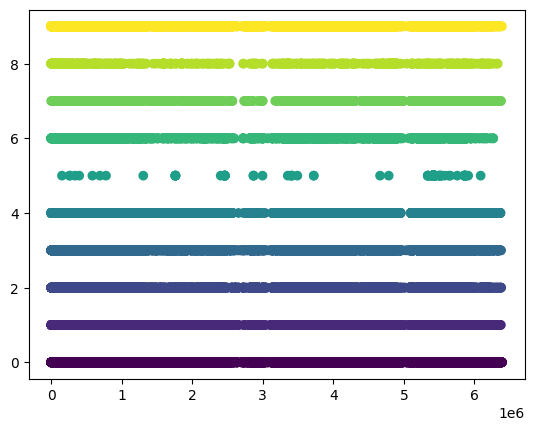

In [48]:
plt.scatter(narations['AC_ID'],narations['k_cat'],c=narations['k_cat'])
plt.show

In [ ]:
# from sklearn.cluster import DBSCAN
# dbscan = DBSCAN(eps=5, min_samples=5).fit_predict(avg_vec_list)

    


In [ ]:
dbscan.labels_

In [ ]:
# def ds_pred(vec):
# #     p = kmeans.predict(vec.reshape(1,-1))
#     p=dbscan.fit_predict(vec.reshape(1,-1))
#     return p

In [ ]:
# print(ds_pred(narations['avg_vec'][0]))


In [ ]:
# print(ds_pred(narations['avg_vec'][3]))
# narations['db_cat']=narations['avg_vec'].apply(ds_pred)

In [ ]:
narations

In [ ]:
np.array_equal(narations['cat'], narations['db_cat'])

In [80]:
sub_data['k_cluster']=narations['k_cat'].copy()

/tmp/ipykernel_339/1490945364.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sub_data['k_cluster']=narations['k_cat'].copy()


In [81]:
sub_data

,Unnamed: 0,AC_ID,AMOUNT,DOC_DATE,NARATION,DR_CR,k_cluster
0,0,3644877,342800.0,01-NOV-22,Cash Withdraw,Debit,[10]
1,1,1175256,342800.0,01-NOV-22,Cash Withdrawal From A/C No.:,Credit,[10]
2,2,2298226,1500.0,01-NOV-22,"Cash withdraw from Micro Merchant point, MM A/C",Debit,[1]
3,3,4066427,1500.0,01-NOV-22,Credit Against Merchant Cash Withdraw Service ...,Credit,[2]
6,6,38418,500.0,01-NOV-22,Cash Deposit to A/C No.:,Debit,[3]
...,...,...,...,...,...,...,...
22538287,22538287,4010179,44900.0,29-APR-23,Guatala Udc,Credit,[10]
22539045,22539045,4199653,20000.0,29-APR-23,"Transaction For Fund Transfer. Smart App, Regu...",Credit,[0]
22539930,22539930,2389876,100.0,29-APR-23,Cash Deposit গারামাসি উল্লী উন্নয়ন,Credit,[3]
22543261,22543261,4817300,34000.0,29-APR-23,আসাদ ভাই এর কাছে জমা হাজার টাকা,Credit,[10]


In [82]:
sub_data.to_csv('output.csv', index=False)